# Julia: a fresh approach to technical computing


* Julia is a high-level programming language for technical computing which allows you to manipulate and analyse large data sets
* Other programming languages similar to Julia are Matlab and Python
* Unlike Python, Julia is build from the ground for techical computing
* Unlike Matlab, julia is free and open-source software
* Julia is fast (http://julialang.org/benchmarks/: these are microbenchmark (with explicit loops) to be taken with a grain of salt, and see also benchmarks below)


## Try Julia

* Try julia online at https://juliabox.com/

## Install Julia

* Go to http://julialang.org/downloads/
* Install also a text editor with julia support (e.g. emacs with the julia mode)

### Optionally

* Install Jupyter http://jupyter.org/

# Variable declarations 

## Unicode

* Unicode in in variables names and function
* For example greek letters
* Typed as, e.g. \alpha followed by Tab (in text editor with Julia support)

In [3]:
α = π/2
σ² = 4

4

* Also for function names

In [4]:
function my_serious_function😼(x,y)
    return y,x
end

my_serious_function😼 (generic function with 1 method)

In [5]:
my_serious_function😼(1,2)

(2, 1)

* also for build-in operators

In [6]:
2 ∈ Set([2,3])

true

In [7]:
2 in Set([2,3])

true

* Do not get crazy

In [8]:
𝔳𝔞𝔯𝔦𝔞𝔟𝔩𝔢 = 1.234
שคгเค๒ɭє = 2.345

2.345

# Functions

* Functions are central in julia:
  * functions are "first-class" (e.g. a variable/parameter can hold a function)
  * all operators are defined as functions: `1+2` is in fact `+(1,2)`
  * functions are very flexible due to [multiple dispatch](https://en.wikipedia.org/wiki/Multiple_dispatch)
* There are 3 ways to define a function:

In [9]:
function times_two(x)
    return 2x
end

times_two (generic function with 1 method)

* `return` is actually optional. If it is not present, then the last value of a function is returned.

In [10]:
times2(x) = 2x

times2 (generic function with 1 method)

In [11]:
x -> 2x

#7 (generic function with 1 method)

# Operators

* Julia has all the usual operators: +, -, *, / as most programming languages have

## Additional interesting operators

* Multiply by the inverse of a matrix: A \ x

In [12]:
x = [1; 1]; A = [2 0; 0 2]; A \ x

2-element Array{Float64,1}:
 0.5
 0.5

* do you like shell pipes? (in DIVA 1081 shell pipes for 154 scripts)

In [13]:
[1:5;]  |> x->x.^2 |> x-> x[x .> 2] |> sum

54

* function composition f ∘ g (x) (type \circ followed by the tab key), in julia 0.6

In [14]:
(abs ∘ sin)(1)

0.8414709848078965

# Arrays

* Arrays can be homogenous or heterogenous
* Julia figures this out for you

* Homogenous arrays:

In [15]:
arr = [1,2,3,4]

4-element Array{Int64,1}:
 1
 2
 3
 4

Elements can also be converted if necessary to make an homogenous array

In [16]:
arr2 = [2.,4.,5]

3-element Array{Float64,1}:
 2.0
 4.0
 5.0

Example of an heterogeneous array

In [17]:
arr = [1,2,"this is a string"]

3-element Array{Any,1}:
 1                  
 2                  
  "this is a string"

## Automatic type inference

In [18]:
function speed(u,v)
    u2 = u.^2
    v2 = v.^2
    s2 = u2 + v2
    s = sqrt.(s2)
    return s
end

speed (generic function with 1 method)

In [19]:
@code_warntype speed(1.,2.)

Body::Float64
│╻╷╷╷╷   broadcasted2 1 ── %1  = %new(Base.RefValue{typeof(^)}, ^)::Base.RefValue{typeof(^)}
││╻╷╷╷╷   map  │    %2  = %new(Base.RefValue{Val{2}}, $(QuoteNode(Val{2}())))::Base.RefValue{Val{2}}
││╻╷      copy  └───       goto #3 if not true
│         2 ──       nothing
│││╻╷╷╷╷   getindex  3 ──       (Base.getfield)(%1, :x)
││││╻╷╷╷    _broadcast_getindex  │          (Base.getfield)(%2, :x)
│││││╻╷╷     _broadcast_getindex_evalf  │    %7  = (Base.mul_float)(u, u)::Float64
││││      └───       goto #4
│││       4 ──       goto #5
││        5 ──       goto #6
│╻╷╷╷╷   broadcasted3 6 ── %11 = %new(Base.RefValue{typeof(^)}, ^)::Base.RefValue{typeof(^)}
││╻╷╷╷╷   map  │    %12 = %new(Base.RefValue{Val{2}}, $(QuoteNode(Val{2}())))::Base.RefValue{Val{2}}
││╻╷      copy  └───       goto #8 if not true
│         7 ──       nothing
│││╻╷╷╷╷   getindex  8 ──       (Base.getfield)(%11, :x)
││││╻╷╷╷    _broadcast_getindex  │          (Base.getfield)(%12, :x)
│││││╻╷╷     _broadcast_ge

In [20]:
speed([1.,2.],[2.,3.])

2-element Array{Float64,1}:
 2.23606797749979 
 3.605551275463989

# Code generation

* The julia compiler generates efficient machine code
* Loops are not slow (compared to Python, Matlab or Octave)
* It is still possible to use vectorized code
  * vectorized code typically uses more memory than code with explicit loops
  * vectorized code is slightly slower than code with with explicit loops
 

In [21]:
@code_llvm speed(1.,2.)


; Function speed
; Location: In[18]:2
define double @julia_speed_36350(double, double) {
top:
; Function materialize; {
; Location: broadcast.jl:756
; Function copy; {
; Location: broadcast.jl:766
; Function getindex; {
; Location: broadcast.jl:515
; Function _broadcast_getindex; {
; Location: broadcast.jl:555
; Function _broadcast_getindex_evalf; {
; Location: broadcast.jl:582
; Function literal_pow; {
; Location: intfuncs.jl:243
; Function *; {
; Location: float.jl:399
  %2 = fmul double %0, %0
;}}}}}}}
; Location: In[18]:3
; Function materialize; {
; Location: broadcast.jl:756
; Function copy; {
; Location: broadcast.jl:766
; Function getindex; {
; Location: broadcast.jl:515
; Function _broadcast_getindex; {
; Location: broadcast.jl:555
; Function _broadcast_getindex_evalf; {
; Location: broadcast.jl:582
; Function literal_pow; {
; Location: intfuncs.jl:243
; Function *; {
; Location: float.jl:399
  %3 = fmul double %1, %1
;}}}}}}}
; Location: In[18]:4
; Function +; {
; Location: f

In [22]:
@code_native speed(1.,2.)

	.text
; Function speed {
; Location: In[18]:2
; Function materialize; {
; Location: broadcast.jl:756
; Function copy; {
; Location: broadcast.jl:766
; Function getindex; {
; Location: broadcast.jl:515
; Function _broadcast_getindex; {
; Location: broadcast.jl:555
; Function _broadcast_getindex_evalf; {
; Location: broadcast.jl:582
; Function literal_pow; {
; Location: intfuncs.jl:243
; Function *; {
; Location: In[18]:2
	vmulsd	%xmm0, %xmm0, %xmm0
;}}}}}}}
; Location: In[18]:3
; Function materialize; {
; Location: broadcast.jl:756
; Function copy; {
; Location: broadcast.jl:766
; Function getindex; {
; Location: broadcast.jl:515
; Function _broadcast_getindex; {
; Location: broadcast.jl:555
; Function _broadcast_getindex_evalf; {
; Location: broadcast.jl:582
; Function literal_pow; {
; Location: intfuncs.jl:243
; Function *; {
; Location: float.jl:399
	vmulsd	%xmm1, %xmm1, %xmm1
;}}}}}}}
; Location: In[18]:4
; Function +; {
; Location: float.jl:395
	vaddsd	%xmm1, %xmm0, %xmm0
;}
; Loc

## Benchmarks


### Mandelbrod fractals

* Median times of 30 runs

| program                 |      style | run time (sec)  |
|------------------|------------|-----------------|
| matlab R2013a    |       loops|   5.67     |
| matlab R2013a    |  vectorized|   2.40  |
|  octave 3.8.1    |       loops| 184.56  |
|  octave 3.8.1    |  vectorized|   4.72  |
|     julia 0.5    |       loops|   0.19 |
|     julia 0.5    |  vectorized|   2.24  |

### Ensemble Transform Kalman Filter (ETKF)

#### Parameters

| parameter                               | value  |
|-----------------------------------------|--------|
| number of elements in the state vector  | 50     |
| ensemble size                           | 100    |
| number of observations                  | 5      |
| number of water columns                 | 10000  |

#### Run-time

| Language | version | comments | run-time (s) |
|----------|---------|----------|--------------|
| Julia    | 0.4.5   | -          | 43.362 |
| Fortran (gfortran)  | 4.8.4   | intrinsic matmul             |  136.481 |
| Fortran (gfortran) | 4.8.4   | matmul calls external BLAS    |  32.483  |
| Matlab   | R2013a  | -         | 31.1854      |
| Octave   | 3.8.1   | -         | 58.019       |




| Language | version | comments | run-time (s) |
|----------|---------|----------|--------------|
| Fortran (gfortran) | 4.8.4   | matmul calls external BLAS    |  32.483  |
| Julia    | 0.5.0   | type-stable, without bounds check         | 29.948924 |


# Working with files
* open a file, and load every line sequentially

In [23]:
f = open("file.txt")
for l in eachline(f)
         println(l)
end
close(f)


this
is
a test


* a common error is to forget to close the file
* with a do-block

In [24]:
open("file.txt") do f
  for l in eachline(f)
     println(l)
  end
end

this
is
a test


* similar to python's `with` statement

# Visualization

* Julia can call all Python modules, for instance also matplotlib
* `PyPlot` is a matplotlib wrapper

In [25]:
using PyPlot

┌ Info: Recompiling stale cache file /home/abarth/.julia/compiled/v1.0/PyPlot/oatAj.ji for PyPlot [d330b81b-6aea-500a-939a-2ce795aea3ee]
└ @ Base loading.jl:1190


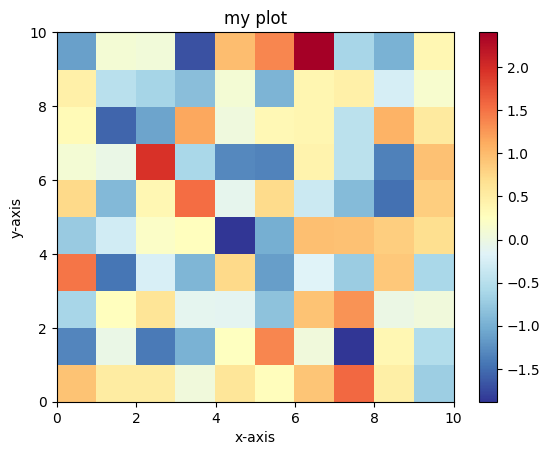

PyObject <matplotlib.colorbar.Colorbar object at 0x7fcf73d479e8>

In [26]:
x = randn(10,10)
pcolor(x)
xlabel("x-axis")
ylabel("y-axis")
title("my plot")
colorbar()

In [27]:
using NetCDF
using PyCall
figure(figsize=(7,4))
@pyimport numpy.ma as ma
fname = "/home/abarth/Lectures/MatlabOctaveTutorial/data/WesternMedSST.nc"
lon = ncread(fname,"lon"); lat = ncread(fname,"lat");
SST = ncread(fname,"seviri_sst");
fillval = ncgetatt(fname,"seviri_sst","_FillValue")
pyma(X) = pycall(ma.array, Any, X, mask=X .== fillval)
pcolor(lon,lat,pyma(SST[:,:,1]')); colorbar()

ArgumentError: ArgumentError: Package NetCDF not found in current path:
- Run `import Pkg; Pkg.add("NetCDF")` to install the NetCDF package.


# Custom types

In [28]:
using PyPlot
using Base

* Create a new type `ParamCovar` which represents an error covariance matrix
* It behaves like an Array of 2 dimensions

In [29]:
type ParamCovar{T} <: AbstractArray{T, 2}
    n:: Int64       # dimension
    len:: T         # correlation length
    var:: T         # variance
    x:: Array{T,2}  # x[i,:] are the n coordinates of the i-th grid point
end

function Base.size{T}(PC::ParamCovar{T})
    return (PC.n,PC.n)
end

function Base.getindex{T}(PC::ParamCovar{T},i,j)
    d2 = sum((PC.x[i,:] - PC.x[j,:]).^2)
    return PC.var * exp(-d2 / (PC.len^2))
end

LoadError: syntax: extra token "ParamCovar" after end of expression

* Define a domain [-10,10] x [-10,10]

In [30]:
imax = 50
jmax = imax

vx1 = linspace(-10,10,imax)
vx2 = linspace(-10,10,jmax)

x1 = [x1 for x1 in vx1, x2 in vx2];
x2 = [x2 for x1 in vx1, x2 in vx2];

UndefVarError: UndefVarError: linspace not defined

* create an instance of the `ParamCovar` type

In [31]:
n = length(x1)
m = 3

# n: number of grid points (total)
# len = 4 (correlation length)
# var = 1 (background variance)

# Pf = ParamCovar{Float64}(n,4.,1.,[x1[:] x2[:]]) or just
Pf = ParamCovar(n,4.,1.,[x1[:] x2[:]]);

UndefVarError: UndefVarError: x1 not defined

* setup additional matrices (observation operator $\mathbf H$, observation error covariance matrix $\mathbf R$, forecast $\mathbf x_f$)

In [32]:
# index of the middle of the domain
ind = sub2ind(size(x1),Int64(imax/2),Int64(jmax/2))

H = sparse([1,2,3],
           [1,ind,n], [1.,1.,1.], 3,n)

R = Diagonal([1,1,1])
yo = [1,-1,1]


xf = zeros(n);

UndefVarError: UndefVarError: x1 not defined

* optimal interpolation

In [33]:
xa = xf + Pf * (H' * ((H*Pf*H' + R) \ (yo - H*xf)))

xa = reshape(xa,size(x1))
pcolor(xa)
colorbar()

UndefVarError: UndefVarError: H not defined


# Parallel programming

* start julia with
  * `-p`: local machine
  * `--machinefile`:  cluster
* or use, e.g. `addprocs(4)` to use 4 workers


## Lower-level constructs

In [34]:
addprocs(4)

# process ID
@show myid()

# number of all process
@show nprocs()

# id of all workers
@show workers()

# run myid() on process 4
@show fetch(@spawnat 4 myid())

UndefVarError: UndefVarError: addprocs not defined

In [35]:
@everywhere heavy_computation(x) =  x.^5;
r = @spawn heavy_computation(2)
fetch(r)

r = @spawnat 2 heavy_computation(2)
fetch(r)

LoadError: UndefVarError: @everywhere not defined

## Distributed arrays

In [36]:
@everywhere using DistributedArrays

y = distribute([1:10;])


# get data from worker 2-5
@show fetch(@spawnat 2 localpart(y))


function some_complex_work(y::DArray)
    return DArray(size(y),procs(y)) do I
        @show I[1]        
        return localpart(y).^2
    end
end

res = some_complex_work(y)
@show res

LoadError: UndefVarError: @everywhere not defined

* work with two distributed arrays

In [37]:
function some_complex_work2(y::DArray, z::DArray)
    return DArray(size(y),procs(y)) do I
        @show I
        localpart(y).^2 + localpart(z).^2
    end
end

z = distribute(2*[1:10;])

res = some_complex_work2(y,z)
@show res

UndefVarError: UndefVarError: DArray not defined

In [38]:
function smoothing(y::DArray)
    return DArray(size(y),procs(y)) do I
        tmp = zeros(length(I[1])); 
        for i = I[1]
            if i > 1 && i < length(y)
                tmp[i - first(I[1]) + 1] = 0.1 * y[i-1] + 0.8 * y[i] + 0.1 * y[i+1]
            else
                tmp[i - first(I[1]) + 1] = y[i]
            end
        end
        return tmp
    end    
end

x = drandn(10)

UndefVarError: UndefVarError: DArray not defined

In [39]:
plot(x); 
xs = smoothing(x); plot(xs);
xs = smoothing(xs); plot(xs);
xs = smoothing(xs); plot(xs);
xs = smoothing(xs); plot(xs);


MethodError: MethodError: no method matching smoothing(::Array{Float64,2})

# Julia with SLURM (e.g. nic4,...)

* Use the package [ClusterManager](https://github.com/JuliaParallel/ClusterManagers.jl) for parallel processing
* Do not use the option `--machinefile` as it bypasses SLURM.
* A full example would be (`submit_julia.sh`):

```bash
#!/bin/bash
#SBATCH --job-name=julia
#SBATCH --output=output-%N-%j.out
#SBATCH --cpus-per-task=1

export script="$1"
echo Julia script $script

bt0=$(date +%s)

julia <<EOF
using ClusterManagers
addprocs(SlurmManager($SLURM_NTASKS))

# Test the connection
hosts = []
for i in workers()
    host, pid = fetch(@spawnat i (gethostname(), getpid()))
    push!(hosts, host)
end

@show hosts

# Run the script
include("$script")

# The Slurm resource allocation is released when all the workers have
# exited
for i in workers()
    rmprocs(i)
end
EOF

bt1=$(date +%s)

awk  " BEGIN { print \"Run time (hours): \",($bt1 - $bt0)/3600 } "
```

* The script can be used as:

```bash
sbatch --ntasks=2 --time=20:00:00 --mem-per-cpu=3000 --job-name=myjob submit_julia.sh /path/to/julia/script.jl
```

## Other nice features of Julia

* good document of the Julia language: http://docs.julialang.org/en/stable/
* find documentation from the julia REPL

In [40]:
apropos("Pearson")

Statistics.cor


┌ Warning: Unable to search documentation of type PyPlot.LazyHelp
└ @ REPL /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/REPL/src/docview.jl:507


In [41]:
?cor

search: Core acorr VecOrMat Vector factorial DenseVecOrMat colors cohere

Couldn't find cor
Perhaps you meant cos, cot, xor, for, Core, acorr, cool, conj, copy or cosc


No documentation found.

Binding `cor` does not exist.


* get all field names of a type (introspection)

In [42]:
S = speye(2);
fieldnames(S)

UndefVarError: UndefVarError: speye not defined

* Most of julia (the programming environement) is written in julia (the language). It is easy to find out where functions or operators are defined:

In [43]:
@which speye(2)

UndefVarError: UndefVarError: speye not defined

* List all functions with a given name (but operating on a different type)

In [44]:
methods(diag)

UndefVarError: UndefVarError: diag not defined

* integrated package manager

```julia
Pkg.add("DataAssim")
```

* Have a look at: http://pkg.julialang.org/

* Easy to write documentation in markdown
* Support for jupyter
* Easy to use with github, travis-ci, codecov.io
* Support of macros (function that can transform your code)
* Numerous constructs to avoid copying data
  * pass argument by reference instead of by value
  * `reshape` gives a different view on the data
  * `SubArray` ` 


In [45]:
A = [1 2 3; 4 5 6];
@show A
b = view(A,:,1)
@show b
b[1] = 100
@show A

A = [1 2 3; 4 5 6]
b = [1, 4]
A = [100 2 3; 4 5 6]


2×3 Array{Int64,2}:
 100  2  3
   4  5  6

* list comprehension

In [46]:
A = [sin(π * x) for x = 0:0.2:1]

6-element Array{Float64,1}:
 0.0                   
 0.5877852522924731    
 0.9510565162951535    
 0.9510565162951536    
 0.5877852522924732    
 1.2246467991473532e-16

In [47]:
A = [sin(π * x) * sin(π * y) for x = 0:0.2:1, y = 0:0.2:1]

6×6 Array{Float64,2}:
 0.0  0.0          0.0          0.0          0.0          0.0        
 0.0  0.345492     0.559017     0.559017     0.345492     7.19829e-17
 0.0  0.559017     0.904508     0.904508     0.559017     1.16471e-16
 0.0  0.559017     0.904508     0.904508     0.559017     1.16471e-16
 0.0  0.345492     0.559017     0.559017     0.345492     7.19829e-17
 0.0  7.19829e-17  1.16471e-16  1.16471e-16  7.19829e-17  1.49976e-32

* do you like shell pipes? (in DIVA 1081 shell pipes for 154 scripts)

In [48]:
[1:5;]  |> x->x.^2 |> x-> x[x .> 2] |> sum

54

ArgumentError: Package JuliaInterpreter not found in current path:
- Run `import Pkg; Pkg.add("JuliaInterpreter")` to install the JuliaInterpreter package.

Stacktrace:
 [1] require(::Module, ::Symbol) at ./loading.jl:823
 [2] eval at ./boot.jl:319 [inlined]
 [3] prepare_thunk(::Module, ::Expr, ::Bool) at /home/abarth/.julia/packages/JuliaInterpreter/Or807/src/construct.jl:355
 [4] prepare_thunk(::Module, ::Expr, ::Bool) at /home/abarth/.julia/packages/JuliaInterpreter/Or807/src/construct.jl:361
 [5] prepare_thunk at /home/abarth/.julia/packages/JuliaInterpreter/Or807/src/construct.jl:347 [inlined]
 [6] #methods_by_execution!#9(::Base.Iterators.Pairs{Symbol,Bool,Tuple{Symbol},NamedTuple{(:define,),Tuple{Bool}}}, ::Function, ::Any, ::Revise.CodeTrackingMethodInfo, ::Dict{Module,Array{Expr,1}}, ::Module, ::Expr) at /home/abarth/.julia/packages/Revise/agmgx/src/lowered.jl:47
 [7] #methods_by_execution! at ./none:0 [inlined]
 [8] #eval_with_signatures#59 at /home/abarth/.julia/packages/Rev

UndefVarError: Frame not defined
Stacktrace:
 [1] macro expansion at /home/abarth/.julia/packages/JuliaInterpreter/Or807/src/interpret.jl:64 [inlined]
 [2] getargs(::Array{Any,1}, ::JuliaInterpreter.Frame) at /home/abarth/.julia/packages/JuliaInterpreter/Or807/src/builtins.jl:8
 [3] maybe_evaluate_builtin(::JuliaInterpreter.Frame, ::Expr, ::Bool) at /home/abarth/.julia/packages/JuliaInterpreter/Or807/src/builtins.jl:136
 [4] #evaluate_call_recurse!#37(::Bool, ::Function, ::Any, ::JuliaInterpreter.Frame, ::Expr) at /home/abarth/.julia/packages/JuliaInterpreter/Or807/src/interpret.jl:209
 [5] evaluate_call_recurse! at /home/abarth/.julia/packages/JuliaInterpreter/Or807/src/interpret.jl:206 [inlined]
 [6] eval_rhs(::Any, ::JuliaInterpreter.Frame, ::Expr) at /home/abarth/.julia/packages/JuliaInterpreter/Or807/src/interpret.jl:381
 [7] step_expr!(::Any, ::JuliaInterpreter.Frame, ::Any, ::Bool) at /home/abarth/.julia/packages/JuliaInterpreter/Or807/src/interpret.jl:509
 [8] signature(::Any, 

 [13] #methods_by_execution!#9(::Base.Iterators.Pairs{Symbol,Bool,Tuple{Symbol},NamedTuple{(:define,),Tuple{Bool}}}, ::Function, ::Any, ::Revise.CodeTrackingMethodInfo, ::Dict{Module,Array{Expr,1}}, ::Module, ::Expr) at /home/abarth/.julia/packages/Revise/agmgx/src/lowered.jl:49
 [14] #methods_by_execution! at ./none:0 [inlined]
 [15] #eval_with_signatures#59 at /home/abarth/.julia/packages/Revise/agmgx/src/Revise.jl:344 [inlined]
 [16] #eval_with_signatures at ./none:0 [inlined]
 [17] #instantiate_sigs!#60(::Bool, ::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}, ::Function, ::OrderedCollections.OrderedDict{Module,OrderedCollections.OrderedDict{Revise.RelocatableExpr,Union{Nothing, Array{Any,1}}}}) at /home/abarth/.julia/packages/Revise/agmgx/src/Revise.jl:352
 [18] instantiate_sigs! at /home/abarth/.julia/packages/Revise/agmgx/src/Revise.jl:349 [inlined]
 [19] maybe_parse_from_cache!(::Revise.PkgData, ::String) at /home/abarth/.julia/packages/Revise/agmgx/src/pk

            if !(startswith(String((ft.name).name), "##"))
                #= /home/abarth/.julia/packages/LoweredCodeUtils/6EZqd/src/LoweredCodeUtils.jl:378 =#
                #= /home/abarth/.julia/packages/LoweredCodeUtils/6EZqd/src/LoweredCodeUtils.jl:378 =# @warn "file $(loc.file), line $(loc.line): no method found for $(sigt)"
            end
        end
        #= /home/abarth/.julia/packages/LoweredCodeUtils/6EZqd/src/LoweredCodeUtils.jl:381 =#
        frame.pc = pc
        #= /home/abarth/.julia/packages/LoweredCodeUtils/6EZqd/src/LoweredCodeUtils.jl:382 =#
        return (if define
                    step_expr!(recurse, frame, stmt, true)
                else
                    next_or_nothing!(frame)
                end, pc3)
    end
    #= /home/abarth/.julia/packages/LoweredCodeUtils/6EZqd/src/LoweredCodeUtils.jl:384 =#
    ismethod1(stmt) || error("expected method opening, got ", stmt)
    #= /home/abarth/.julia/packages/LoweredCodeUtils/6EZqd/src/LoweredCodeUtils.jl:38

 [8] signature(::Any, ::JuliaInterpreter.Frame, ::Any, ::Int64) at /home/abarth/.julia/packages/LoweredCodeUtils/6EZqd/src/LoweredCodeUtils.jl:146
 [9] #methoddef!#3(::Bool, ::Function, ::Any, ::Array{Any,1}, ::JuliaInterpreter.Frame, ::Any, ::Int64) at /home/abarth/.julia/packages/LoweredCodeUtils/6EZqd/src/LoweredCodeUtils.jl:420
 [10] (::getfield(LoweredCodeUtils, Symbol("#kw##methoddef!")))(::NamedTuple{(:define,),Tuple{Bool}}, ::typeof(LoweredCodeUtils.methoddef!), ::Function, ::Array{Any,1}, ::JuliaInterpreter.Frame, ::Expr, ::Int64) at ./none:0
 [11] #methods_by_execution!#14(::Bool, ::Bool, ::Function, ::Any, ::Revise.CodeTrackingMethodInfo, ::Dict{Module,Array{Expr,1}}, ::JuliaInterpreter.Frame) at /home/abarth/.julia/packages/Revise/agmgx/src/lowered.jl:81
 [12] #methods_by_execution! at ./none:0 [inlined]
 [13] #methods_by_execution!#9(::Base.Iterators.Pairs{Symbol,Bool,Tuple{Symbol},NamedTuple{(:define,),Tuple{Bool}}}, ::Function, ::Any, ::Revise.CodeTrackingMethodInfo, ::D

 [13] #methods_by_execution!#9(::Base.Iterators.Pairs{Symbol,Bool,Tuple{Symbol},NamedTuple{(:define,),Tuple{Bool}}}, ::Function, ::Any, ::Revise.CodeTrackingMethodInfo, ::Dict{Module,Array{Expr,1}}, ::Module, ::Expr) at /home/abarth/.julia/packages/Revise/agmgx/src/lowered.jl:49
 [14] #methods_by_execution! at ./none:0 [inlined]
 [15] #eval_with_signatures#59 at /home/abarth/.julia/packages/Revise/agmgx/src/Revise.jl:344 [inlined]
 [16] #eval_with_signatures at ./none:0 [inlined]
 [17] #instantiate_sigs!#60(::Bool, ::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}, ::Function, ::OrderedCollections.OrderedDict{Module,OrderedCollections.OrderedDict{Revise.RelocatableExpr,Union{Nothing, Array{Any,1}}}}) at /home/abarth/.julia/packages/Revise/agmgx/src/Revise.jl:352
 [18] instantiate_sigs! at /home/abarth/.julia/packages/Revise/agmgx/src/Revise.jl:349 [inlined]
 [19] maybe_parse_from_cache!(::Revise.PkgData, ::String) at /home/abarth/.julia/packages/Revise/agmgx/src/pk

 [17] #instantiate_sigs!#60(::Bool, ::Base.Iterators.Pairs{Union{},Union{},Tuple{},NamedTuple{(),Tuple{}}}, ::Function, ::OrderedCollections.OrderedDict{Module,OrderedCollections.OrderedDict{Revise.RelocatableExpr,Union{Nothing, Array{Any,1}}}}) at /home/abarth/.julia/packages/Revise/agmgx/src/Revise.jl:352
 [18] instantiate_sigs! at /home/abarth/.julia/packages/Revise/agmgx/src/Revise.jl:349 [inlined]
 [19] maybe_parse_from_cache!(::Revise.PkgData, ::String) at /home/abarth/.julia/packages/Revise/agmgx/src/pkgs.jl:224
 [20] (::getfield(Revise, Symbol("##26#27")){String})() at /home/abarth/.julia/packages/Revise/agmgx/src/pkgs.jl:370
 [21] with_logstate(::getfield(Revise, Symbol("##26#27")){String}, ::Base.CoreLogging.LogState) at ./logging.jl:395
 [22] with_logger at ./logging.jl:491 [inlined]
 [23] watch_manifest(::String) at /home/abarth/.julia/packages/Revise/agmgx/src/pkgs.jl:349
 [24] (::Revise.Rescheduler{typeof(Revise.watch_manifest),Tuple{String}})() at /home/abarth/.julia/pac

UndefVarError: PkgFiles not defined
Stacktrace:
 [1] #collect_args#33(::Bool, ::Function, ::JuliaInterpreter.Frame, ::Expr) at /home/abarth/.julia/packages/JuliaInterpreter/Or807/src/interpret.jl:64
 [2] collect_args at /home/abarth/.julia/packages/JuliaInterpreter/Or807/src/interpret.jl:139 [inlined]
 [3] lookup_callexpr at /home/abarth/.julia/packages/Revise/agmgx/src/lowered.jl:13 [inlined]
 [4] #methods_by_execution!#14(::Bool, ::Bool, ::Function, ::Any, ::Revise.CodeTrackingMethodInfo, ::Dict{Module,Array{Expr,1}}, ::JuliaInterpreter.Frame) at /home/abarth/.julia/packages/Revise/agmgx/src/lowered.jl:187
 [5] #methods_by_execution! at ./none:0 [inlined]
 [6] #methods_by_execution!#9(::Base.Iterators.Pairs{Symbol,Bool,Tuple{Symbol},NamedTuple{(:define,),Tuple{Bool}}}, ::Function, ::Any, ::Revise.CodeTrackingMethodInfo, ::Dict{Module,Array{Expr,1}}, ::Module, ::Expr) at /home/abarth/.julia/packages/Revise/agmgx/src/lowered.jl:49
 [7] #methods_by_execution! at ./none:0 [inlined]
 [8] 

 [14] with_logstate(::getfield(Revise, Symbol("##26#27")){String}, ::Base.CoreLogging.LogState) at ./logging.jl:395
 [15] with_logger at ./logging.jl:491 [inlined]
 [16] watch_manifest(::String) at /home/abarth/.julia/packages/Revise/agmgx/src/pkgs.jl:349
 [17] (::Revise.Rescheduler{typeof(Revise.watch_manifest),Tuple{String}})() at /home/abarth/.julia/packages/Revise/agmgx/src/types.jl:235
while evaluating
import Tokenize.Lexers: Lexer, peekchar, iswhitespace
in module Main.CSTParser
LoadError: UndefVarError: @default not defined
Stacktrace:
 [1] top-level scope
 [2] lower at ./meta.jl:68 [inlined]
 [3] prepare_thunk(::Module, ::Expr, ::Bool) at /home/abarth/.julia/packages/JuliaInterpreter/Or807/src/construct.jl:360
 [4] prepare_thunk at /home/abarth/.julia/packages/JuliaInterpreter/Or807/src/construct.jl:347 [inlined]
 [5] #methods_by_execution!#9(::Base.Iterators.Pairs{Symbol,Bool,Tuple{Symbol},NamedTuple{(:define,),Tuple{Bool}}}, ::Function, ::Any, ::Revise.CodeTrackingMethodInfo,

        ret = #= /home/abarth/.julia/packages/CSTParser/i8cPl/src/CSTParser.jl:90 =# @default(ps, #= /home/abarth/.julia/packages/CSTParser/i8cPl/src/CSTParser.jl:90 =# @closer(ps, block, parse_do(ps, ret)))
    elseif #= /home/abarth/.julia/packages/CSTParser/i8cPl/src/CSTParser.jl:91 =# isajuxtaposition(ps, ret)
        #= /home/abarth/.julia/packages/CSTParser/i8cPl/src/CSTParser.jl:92 =#
        if is_number(ret) && last(ret.val) == '.'
            #= /home/abarth/.julia/packages/CSTParser/i8cPl/src/CSTParser.jl:93 =#
            ps.errored = true
            #= /home/abarth/.julia/packages/CSTParser/i8cPl/src/CSTParser.jl:94 =#
            ret = mErrorToken(ret, CannotJuxtapose)
        end
        #= /home/abarth/.julia/packages/CSTParser/i8cPl/src/CSTParser.jl:96 =#
        op = mOPERATOR(0, 0, Tokens.STAR, false)
        #= /home/abarth/.julia/packages/CSTParser/i8cPl/src/CSTParser.jl:97 =#
        ret = parse_operator(ps, ret, op)
    elseif #= /home/abarth/.julia/packages/CST

            #= /home/abarth/.julia/packages/CSTParser/i8cPl/src/CSTParser.jl:160 =#
            ret = EXPR(InvisBrackets, args)
        else
            #= /home/abarth/.julia/packages/CSTParser/i8cPl/src/CSTParser.jl:162 =#
            accept_rparen(ps, args)
            #= /home/abarth/.julia/packages/CSTParser/i8cPl/src/CSTParser.jl:163 =#
            ret = EXPR(TupleH, args)
        end
        #= /home/abarth/.julia/packages/CSTParser/i8cPl/src/CSTParser.jl:165 =#
        return ret
    end
in module Main.CSTParser
UndefVarError: ParseState not defined
Stacktrace:
 [1] macro expansion at /home/abarth/.julia/packages/JuliaInterpreter/Or807/src/interpret.jl:64 [inlined]
 [2] getargs(::Array{Any,1}, ::JuliaInterpreter.Frame) at /home/abarth/.julia/packages/JuliaInterpreter/Or807/src/builtins.jl:8
 [3] maybe_evaluate_builtin(::JuliaInterpreter.Frame, ::Expr, ::Bool) at /home/abarth/.julia/packages/JuliaInterpreter/Or807/src/builtins.jl:136
 [4] #evaluate_call_recurse!#37(::Bool, ::Fun

 [19] maybe_parse_from_cache!(::Revise.PkgData, ::String) at /home/abarth/.julia/packages/Revise/agmgx/src/pkgs.jl:224
 [20] (::getfield(Revise, Symbol("##26#27")){String})() at /home/abarth/.julia/packages/Revise/agmgx/src/pkgs.jl:370
 [21] with_logstate(::getfield(Revise, Symbol("##26#27")){String}, ::Base.CoreLogging.LogState) at ./logging.jl:395
 [22] with_logger at ./logging.jl:491 [inlined]
 [23] watch_manifest(::String) at /home/abarth/.julia/packages/Revise/agmgx/src/pkgs.jl:349
 [24] (::Revise.Rescheduler{typeof(Revise.watch_manifest),Tuple{String}})() at /home/abarth/.julia/packages/Revise/agmgx/src/types.jl:235
while evaluating
function parse(ps::ParseState, cont=false)
    #= /home/abarth/.julia/packages/CSTParser/i8cPl/src/CSTParser.jl:205 =#
    if ((ps.l).io).size == 0
        #= /home/abarth/.julia/packages/CSTParser/i8cPl/src/CSTParser.jl:206 =#
        return (if cont
                    EXPR(FileH, EXPR[])
                else
                    nothing
            

* Support for GPU programming
   * package ArrayFire
   * Native support for GPU programming is in developpement
* Version 0.6 is [planned](https://discourse.julialang.org/t/0-6-release-timeline/836) for end of February 
* Interesting read: [A Journey Through Julia: A dynamic and fast language](http://hdl.handle.net/2268/203491) from Thibaut Cuvelier

# Caveats

* Plotting data with missing values is/was not as straight-foreward as in Matlab/Octave. Now PyPlot ignored NaNs as in Matlab/Octave
* It takes some time to compile/recompile modules  (which can be a bit annoying in interactive use)
* Still a young language
